# 목적
- evaldata.csv : 학생들의 project(작품)들을 여러 평가자가 3가지 평가항목(score1, scroe2, score2)에 대하여, 5점 척도로 평가한 데이터
- 표준정규화와 min-max 정규화를 시행하여, 각 정규화 방법 별로 우수한 작품 5개를 선발하시오
- 제한 : pandas 라이브러리를 사용하고, for 또는 while loop 명령과  iloc, loc 등의 pandas 함수 사용 금지

### 분석
- 평가자별로 정규화 진행 후 데이터 종합합니다.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 로드

In [173]:
evaldata = pd.read_csv('evaldata.csv')
evaldata.head()

,index,evaluator,project,score1,score2,score3
0,0,A,126,4,3,2
1,1,A,127,3,3,3
2,2,A,128,3,2,2
3,3,A,129,4,3,3
4,4,A,130,4,3,3


### 평가자별로 분리

In [116]:
groupped_evaluator = evaldata.groupby(evaldata['evaluator'])

groupped_evaluator['score_sum'].min()
groupped_evaluator['score_sum'].max()
groupped_evaluator['score_sum'].mean()['A']
groupped_evaluator['score_sum'].std()

evaluator
A    1.224745
B    1.069045
C    1.164965
D    2.697736
E    1.500000
F    1.302470
G    1.322876
H    1.802776
I    1.488048
J    1.187735
K    2.507133
L    1.166667
M    1.000000
N    1.195229
O    2.121320
X         NaN
Name: score_sum, dtype: float64

### Min-Max 정규화
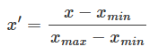

In [113]:
groupped_evaluator['score_sum'].min()[['A', 'B']].values

array([ 7, 12])

In [114]:
evaldata['score_sum'] - groupped_evaluator['score_sum'].min()[evaldata['evaluator']].values

0      2
1      2
2      0
3      3
4      3
      ..
124    5
125    2
126    0
127    0
128    5
Name: score_sum, Length: 129, dtype: int64

In [179]:
def min_max_evaluator(df, get_value, evaluator):
    group = df.groupby(df[evaluator])
    min = group[get_value].min()
    max = group[get_value].max()
    return (df[get_value] - min[df[evaluator]].values)/(max[df[evaluator]].values - min[df[evaluator]].values)
groupped_evaluator_min_max = min_max_evaluator(evaldata, 'score1', 'evaluator')
groupped_evaluator_min_max

0      1.0
1      0.5
2      0.5
3      1.0
4      1.0
      ... 
124    1.0
125    0.5
126    0.0
127    0.0
128    1.0
Name: score1, Length: 129, dtype: float64

### 표준 정규화
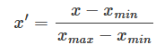

In [180]:
def standardization_evaluator(df, get_value, evaluator):
    group = df.groupby(df[evaluator])
    mean = group[get_value].mean()
    std = group[get_value].std()
    return (df[get_value] - mean[df[evaluator]].values)/ std[df[evaluator]].values
groupped_evaluator_standardization = standardization_evaluator(evaldata, 'score1', 'evaluator')
groupped_evaluator_standardization

0      1.137070
1     -0.142134
2     -0.142134
3      1.137070
4      1.137070
         ...   
124    1.421338
125    0.142134
126   -1.137070
127   -1.137070
128    1.421338
Name: score1, Length: 129, dtype: float64

# 데이터 반영
- score1, score2, score3 데이터 정규화 진행

In [182]:
evaldata['score1_min_max'] = min_max_evaluator(evaldata, 'score1', 'evaluator')
evaldata['score2_min_max'] = min_max_evaluator(evaldata, 'score2', 'evaluator')
evaldata['score3_min_max'] = min_max_evaluator(evaldata, 'score3', 'evaluator')
evaldata['score_sum_mix_max'] = (evaldata['score1_min_max'] + evaldata['score2_min_max'] + evaldata['score3_min_max']) / 3

In [183]:
evaldata['score1_standardization'] = standardization_evaluator(evaldata, 'score1', 'evaluator')
evaldata['score2_standardization'] = standardization_evaluator(evaldata, 'score2', 'evaluator')
evaldata['score3_standardization'] = standardization_evaluator(evaldata, 'score3', 'evaluator')
evaldata['score_sum_standardization'] = (evaldata['score1_standardization'] + evaldata['score2_standardization'] + evaldata['score3_standardization']) / 3

In [184]:
evaldata

,index,evaluator,project,score1,score2,score3,score1_min_max,score2_min_max,score3_min_max,score_sum_mix_max,score1_standardization,score2_standardization,score3_standardization,score_sum_standardization
0,0,A,126,4,3,2,1.0,0.5,0.0,0.500000,1.137070,0.000000,-1.479201,-0.114043
1,1,A,127,3,3,3,0.5,0.5,0.5,0.500000,-0.142134,0.000000,0.184900,0.014255
2,2,A,128,3,2,2,0.5,0.0,0.0,0.166667,-0.142134,-2.000000,-1.479201,-1.207111
3,3,A,129,4,3,3,1.0,0.5,0.5,0.666667,1.137070,0.000000,0.184900,0.440657
4,4,A,130,4,3,3,1.0,0.5,0.5,0.666667,1.137070,0.000000,0.184900,0.440657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,O,121,5,4,5,1.0,1.0,1.0,1.000000,1.421338,1.333333,1.257656,1.337443
125,125,O,122,4,3,4,0.5,0.0,0.5,0.333333,0.142134,-0.666667,0.228665,-0.098623
126,126,O,123,3,3,3,0.0,0.0,0.0,0.000000,-1.137070,-0.666667,-0.800327,-0.868021
127,127,O,124,3,3,3,0.0,0.0,0.0,0.000000,-1.137070,-0.666667,-0.800327,-0.868021


### Project 별 정규화 평균값 획득

In [187]:
projects_min_max = evaldata['score_sum_mix_max'].groupby(evaldata['project']).mean()
projects_min_max.head(5)


project
101    0.574074
102    0.203704
103    0.203704
104    0.333333
105    0.277778
Name: score_sum_mix_max, dtype: float64

In [188]:
projects_standardization = evaldata['score_sum_standardization'].groupby(evaldata['project']).mean()
projects_standardization.head(5)

project
101    0.410185
102   -0.436231
103   -0.460268
104   -0.122528
105   -0.245477
Name: score_sum_standardization, dtype: float64

### Top 5 선정

In [189]:
projects_min_max.sort_values(ascending=False).head(5)

project
204    0.888889
107    0.814815
132    0.796296
109    0.791667
206    0.777778
Name: score_sum_mix_max, dtype: float64

In [190]:
projects_standardization.sort_values(ascending=False).head(5)

project
107    1.120909
109    1.009076
119    0.916160
132    0.824498
108    0.609261
Name: score_sum_standardization, dtype: float64